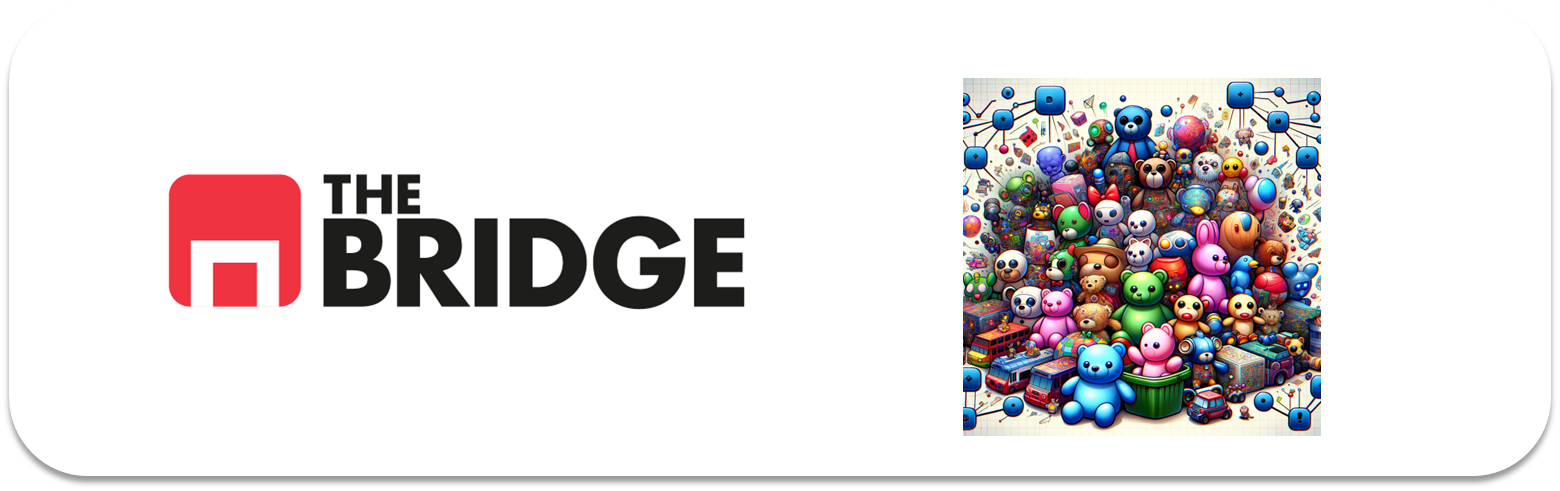

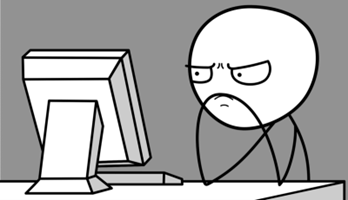

## PRACTICA OBLIGATORIA: K-MEANS

* La práctica obligatoria de esta unidad consiste en un ejercicio de modelado no supervisado sobre imágenes para practicar con el algoritmo k-means. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.preprocessing import MinMaxScaler

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## **#1**

Vamos a trabajar con un dataset también entre los "clásicos" (aunque a veces menos conocido) que es el de rostros Olivetti. Este dataset contiene 400 imágenes en escala de grises de 64 × 64 píxeles de rostros.   


Como en otros datasets de imágenes, estás están "aplanadas" de forma que cada pixel es una feature y por cada imagen hay $64\times 64 = 4096$ features.  

Se fotografiaron 40 personas diferentes (10 veces cada una) y esas fotografías se recogen en el dataset.  

La tarea habitual es entrenar un modelo que pueda predecir qué persona está representada en cada imagen, pero nosotros lo vamos a hacer de forma no supervisada. 



### #1.1


Carga el conjunto de datos usando la función `sklearn.datasets.fetch_olivetti_faces()`. Recuerda que se carga un "diccionario". Muestra su descripción acudiendo a la clave "DESCR".

In [1]:
from sklearn.datasets import fetch_olivetti_faces


data = fetch_olivetti_faces()


print(data.DESCR)


.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   =====================
    Classes    

### #1.2 

Aunque no lo vas a usar hasta el final de la práctica, muestra el target. Luego cargalo todo en un mismo dataframe (tendrás que añadir el target) y obtén otro dataset con todas las imagenes reordenadas aleatoriamente (emplea por ejemplo el método `sample` del dataframe o el método que tú quieras)

In [3]:

# Ver el target --> números del 0 al 39 que representan las diferentes personas a las que se le hicieron las fotos
data.target



array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [4]:
data.data

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        0.15289256],
       [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
        0.15289256],
       ...,
       [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
        0.19008264],
       [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
        0.60330576],
       [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
        0.38429752]], dtype=float32)

In [7]:
# DF con los datos de las imágenes y el target
df_f = pd.DataFrame(data.data)
df_f['target'] = data.target


In [9]:
# Reordenar el DF
df = df_f.sample(frac=1).reset_index(drop=True)

# Mostrar las primeras filas del DataFrame reordenado
df

# puedo observar que está compuesto por 400 filas:
# - cada fila es una imagen 
# - hay 40 personas diferentes y 10 imágenes por persona
# - cada columna representa un píxel
# - las imágenes son de 64x64, por lo que hay un total de 4096 columnas 
# - la última columna identifica a cada fotografía con cada persona (target)

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,0.243802,0.198347,0.561983,0.677686,0.743802,0.772727,0.797521,0.805785,0.814050,0.818182,...,0.214876,0.177686,0.136364,0.148760,0.140496,0.148760,0.136364,0.165289,0.169421,27
1,0.429752,0.516529,0.673554,0.752066,0.772727,0.768595,0.780992,0.809917,0.805785,0.797521,...,0.074380,0.066116,0.074380,0.074380,0.078512,0.086777,0.107438,0.140496,0.157025,26
2,0.615702,0.652893,0.640496,0.685950,0.739669,0.764463,0.793388,0.805785,0.801653,0.814050,...,0.231405,0.256198,0.128099,0.095041,0.090909,0.090909,0.099174,0.086777,0.082645,13
3,0.289256,0.157025,0.148760,0.190083,0.169421,0.194215,0.404959,0.607438,0.669421,0.677686,...,0.400826,0.421488,0.429752,0.433884,0.425620,0.438017,0.438017,0.210744,0.206612,3
4,0.144628,0.210744,0.285124,0.342975,0.392562,0.404959,0.409091,0.413223,0.429752,0.454545,...,0.710744,0.582645,0.421488,0.491736,0.508264,0.305785,0.239669,0.247934,0.264463,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.123967,0.132231,0.111570,0.111570,0.119835,0.136364,0.136364,0.136364,0.157025,0.190083,...,0.842975,0.603306,0.413223,0.677686,0.760331,0.607438,0.268595,0.301653,0.326446,32
396,0.136364,0.239669,0.342975,0.446281,0.549587,0.640496,0.677686,0.694215,0.719008,0.747934,...,0.442149,0.413223,0.289256,0.239669,0.400826,0.404959,0.293388,0.285124,0.268595,37
397,0.557851,0.628099,0.677686,0.702479,0.710744,0.743802,0.756198,0.764463,0.785124,0.789256,...,0.132231,0.293388,0.322314,0.392562,0.462810,0.475207,0.446281,0.272727,0.392562,24
398,0.632231,0.657025,0.677686,0.702479,0.727273,0.747934,0.764463,0.764463,0.772727,0.780992,...,0.177686,0.165289,0.161157,0.165289,0.177686,0.173554,0.190083,0.219008,0.272727,2


### #1.3

Vamos a dividir en train y test, pero OJO RECUERDA QUE EN LOS PROBLEMAS NO SUPERVISADOS NO HAY SPLIT (porque no hay target), aquí lo hacemos para poder comparar posteriormente el clustering con la clasificación (ya que es uan práctica formativa).

Por tanto, divídelo en un conjunto de entrenamiento, un conjunto de validación y un conjunto de pruebas (80-10-10). Dado que el conjunto de datos es bastante pequeño, emplea un muestreo estratificado para asegurarse de que haya el mismo número de imágenes por persona en cada conjunto (estratificando por la columna que contenga el target)

NOTA: No hemos hecho hasta ahora la separación en tres sets, investiga por tu cuenta o bien haz primero un split 90-10 y luego otro split 89-11 sobre el de 80 (para que de los números aproximados), por ejemplo.

In [10]:
from sklearn.model_selection import train_test_split

# Dividir el DataFrame en un 90% para "train_valid" y un 10% para "test", estratificando por "target"
train_df, test_df = train_test_split(df, test_size=0.1, stratify=df['target'])

# Dividir el "train_valid" en un 89% para "train" y un 11% para "valid", para aproximarnos a una división 80-10-10
train_df, valid_df = train_test_split(train_df, test_size=1/9, stratify=train_df['target'])

# train_df ----> 80% de los datos
# valid_df ----> 10% de los datos
# test_df  ----> 10% de los datos


### #1.4

Crea los pares X,y para train, validation y test.

In [11]:
# Conjunto de entrenamiento
# axis =1 para indicar columna
X_train = train_df.drop('target', axis=1)
y_train = train_df['target']

# Conjunto de validación
X_valid = valid_df.drop('target', axis=1)
y_valid = valid_df['target']

# Conjunto de pruebas
X_test = test_df.drop('target', axis=1)
y_test = test_df['target']

Utiliza la siguiente función para visualizar alguna de las caras (observa que tienes que dar la X y la y, usa iloc en ambos datasets)

In [12]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

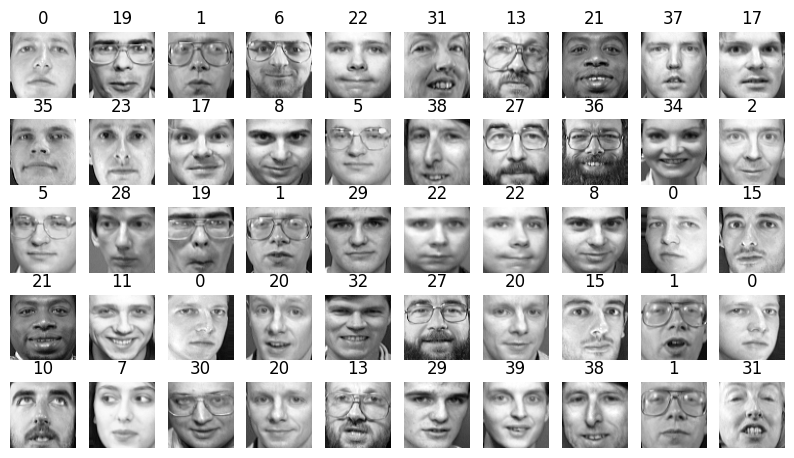

In [15]:
x_sel = X_train.iloc[:50].values  # Selecciona las primeras 10 imágenes
y_sel = y_train.iloc[:50].values  # Selecciona las etiquetas correspondientes a esas imágenes

# Llamar a la función plot_faces para visualizar las imágenes y etiquetas seleccionadas.
plot_faces(x_sel, y_sel, n_cols=10)

### #1.5

Para acelerar las cosas, reduciremos la dimensionalidad de los datos utilizando PCA (técnica que veremos en el siguiente sprint). Modifica la siguiente celda de forma que las X se correspondan con las que has utilizado en el ejercicio anterior.

In [16]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

pca.n_components_

220

### 1.6

Aquí viene la parte del león. A continuación, agrupa las imágenes utilizando K-Means sobre el dataset de train reducido en el ejercicio anterior. Emplea el método del máximo de score de silueta para obtener el mejor k, probando con K de 5 en 5 hasta 150. ¿Cuál es el k que proporciona el mejor score de silueta? NOTA: Emplea todas las features (no hace falta seleccionar, y ya están escaladas entre 0 y 1)

In [18]:
# Rango de valores de k para probar en KMeans, de 5 en 5 hasta 150
k_values = range(5, 151, 5)

# Inicializo lista para almacenar los scores de silueta para cada k
silueta_scores = []

# Iterar sobre los posibles valores de k
for k in k_values:
    # Inicializar el modelo KMeans con el número actual de clusters (k) y una semilla aleatoria para poder reproducirlo
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Ajustar el modelo KMeans a los datos de entrenamiento con dimensionalidad reducida por PCA
    kmeans.fit(X_train_pca)
    
    # Calcular el score de silueta para el clustering actual
    # El score de silueta mide qué tan similar es un objeto a su propio cluster en comparación con otros clusters
    # Los valores van de -1 (incorrecto) a 1 (muy correcto). Un valor alto indica que los objetos están bien emparejados
    # a sus propios clusters y mal emparejados a los vecinos clusters
    score = silhouette_score(X_train_pca, kmeans.labels_)
    
    # Añadir el score de silueta para el valor actual de k a la lista de scores
    silueta_scores.append(score)

# Encontrar el índice del mayor score de silueta en la lista de scores.
# np.argmax devuelve el índice del primer máximo encontrado, que corresponde al mejor k.
mejor_k = k_values[np.argmax(silueta_scores)]

# Obtener el valor máximo de score de silueta, que corresponde al mejor rendimiento de clustering encontrado.
mejor_score = max(silueta_scores)

# Imprimir el mejor valor de k y el correspondiente score de silueta.
print("Mejor k:", mejor_k)
print("Mejor score de silueta:", mejor_score)

Mejor k: 110
Mejor score de silueta: 0.22101283


In [19]:
silueta_scores

[0.10703592,
 0.090566,
 0.10480013,
 0.11200762,
 0.13165629,
 0.13206585,
 0.14986381,
 0.15827277,
 0.1485215,
 0.16920826,
 0.17452258,
 0.17942038,
 0.19090453,
 0.19192955,
 0.19543552,
 0.2024556,
 0.20066857,
 0.21598148,
 0.20621876,
 0.21132569,
 0.21593337,
 0.22101283,
 0.21690515,
 0.21240774,
 0.22033325,
 0.21091981,
 0.2160557,
 0.21087289,
 0.20875922,
 0.20146509]

In [23]:
mejor_k

110

### #1.7

Repite el ejercio anterior empleando ahora el método del codo de Inercia. ¿Sale algo más concluyente o que refuerce el anterior resultado?

In [25]:
# Rango de valores de k para probar en KMeans, de 5 en 5 hasta 150.
k_values = range(5, 151, 5)

# Lista para almacenar las inercias para cada k.
inercias = []

# Iterar sobre los posibles valores de k.
for k in k_values:
    # Inicializar el modelo KMeans con el número actual de clusters (k) y una semilla aleatoria para reproducibilidad.
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Ajustar el modelo KMeans a los datos de entrenamiento con dimensionalidad reducida por PCA.
    kmeans.fit(X_train_pca)
    
    # La inercia es la suma de las distancias cuadradas de las muestras a su centro de cluster más cercano.
    inercias.append(kmeans.inertia_)



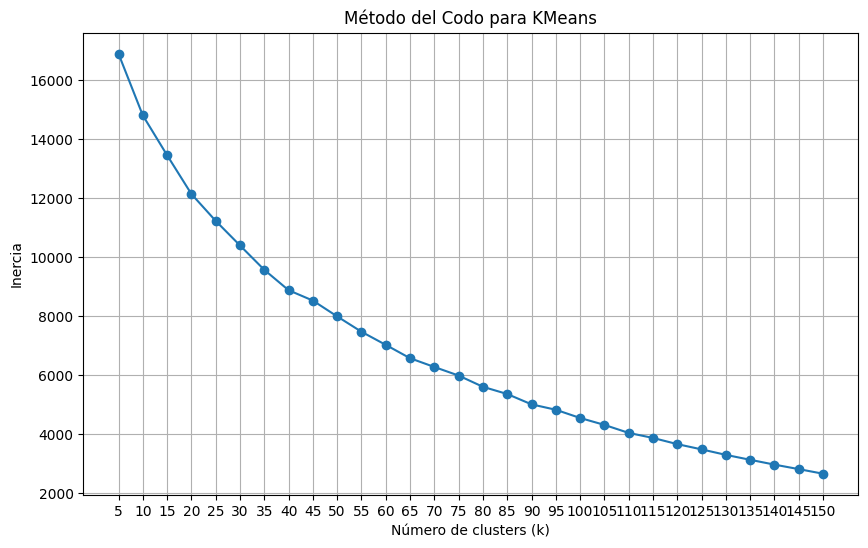

In [26]:
# Pintar gráfica de codo
plt.figure(figsize=(10, 6))
plt.plot(k_values, inercias, marker='o')
plt.title('Método del Codo para KMeans')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [ ]:
# el Método del Codo busca identificar un punto donde aumentar el número de clústeres no resulte en una mejora significativa de la inercia
# en este caso, no se ve un codo muy claro, ya que la lína se encientra decreciendo desde los 5 k
# esto nos indica que a más clusteres prácticmanete desde el inicio --> a más clusteres más se complica el modelo

### #1.8

Quédate con el k obtenido con el método del score de silueta y asigna el modelo con ese k a una variable `best_model`

In [28]:
# Inicializar el modelo KMeans con el número óptimo de clusters obtenido (mejor_k = 110)
best_model = KMeans(n_clusters=mejor_k, random_state=42)

# Ajustar el modelo KMeans a los datos de entrenamiento con dimensionalidad reducida por PCA
best_model.fit(X_train_pca)

# Ahora la variable `best_model` contiene el modelo KMeans ajustado con el mejor número de clusters
# según el score de silueta, que en este caso es 110.

KMeans(n_clusters=110, random_state=42)

### #1.9

Haz una valoración del método de clustering para el K elegido. Para ello crea un programa que recorra la lista de etiquetas dadas por "best_model" y que, haciendo uso de la función que ya te hemos proporcionado, pinte las caras asignadas a los 10 primeros clústeres. Ojo tendrás que hacer una pequeña adaptación porque las features de entrenamiento no son las features reales (son una "transformación" de estas) y si pasas el X de entrenamiento no verás nada. ¿Ves caras similares?

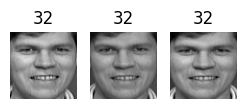

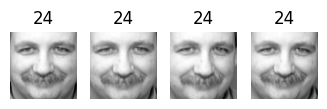

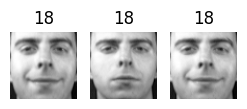

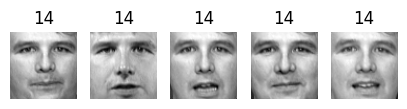

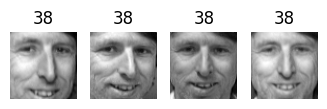

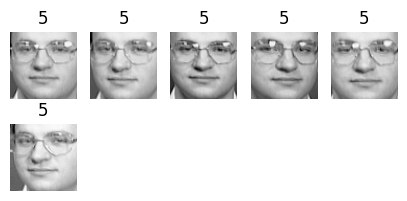

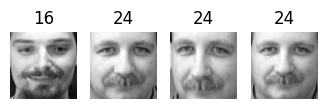

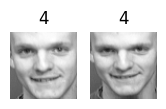

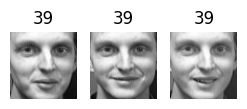

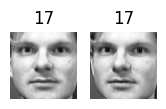

In [35]:


# Obtener las etiquetas de clúster para cada imagen en el conjunto de entrenamiento
cluster_labels = best_model.labels_

# Convertir las características de entrenamiento de nuevo a su forma original de imagen (64x64).
# Asumiendo que X_train contiene las imágenes aplanadas.
X_train_images = X_train.values.reshape(-1, 64, 64)

# Definir la función para visualizar las caras.
def plot_faces(faces, labels, n_cols=5):
    # Asegurarse de que las caras están en la forma correcta para ser visualizadas.
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

# Iterar sobre los clusters que le indique según el range y luego pintar las caras a través de la función plot_faces
for i in range(10):  # Limitar a los primeros k
    # Encontrar las imágenes correspondientes a cada clúster.
    indices = np.where(cluster_labels == i)[0]
    # Seleccionar las imágenes para este clúster.
    cluster_faces = X_train_images[indices]
    # Obtener las etiquetas de destino para este clúster para la visualización.
    target_labels = y_train.iloc[indices].tolist()  # Usar tolist() para asegurarse de que las etiquetas sean una lista simple.
    # Visualizar las caras con la función plot_faces.
    # Asegurarse de pasar las etiquetas correctas a la función.
    plot_faces(cluster_faces, target_labels, n_cols=5)



In [36]:

n_clusters = best_model.n_clusters

print("Número de clústeres:", n_clusters)


Número de clústeres: 110


In [38]:
'''

# Alternativa para visualizar todos los clusters en D2 a través de un diagrama de dispersión

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reducir la dimensionalidad de los datos de entrenamiento a 2 dimensiones usando PCA
pca = PCA(n_components=2)
X_train_pca_2d = pca.fit_transform(X_train)

# Crear un gráfico de dispersión de los datos reducidos
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca_2d[:, 0], X_train_pca_2d[:, 1], c=best_model.labels_, cmap='viridis', marker='.')
plt.title('Visualización de los Clústeres en 2D')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.colorbar(label='Etiqueta de clúster')
plt.show()

'''

"\n\n# Alternativa para visualizar todos los clusters en D2 a través de un diagrama de dispersión\n\nfrom sklearn.decomposition import PCA\nimport matplotlib.pyplot as plt\n\n# Reducir la dimensionalidad de los datos de entrenamiento a 2 dimensiones usando PCA\npca = PCA(n_components=2)\nX_train_pca_2d = pca.fit_transform(X_train)\n\n# Crear un gráfico de dispersión de los datos reducidos\nplt.figure(figsize=(8, 6))\nplt.scatter(X_train_pca_2d[:, 0], X_train_pca_2d[:, 1], c=best_model.labels_, cmap='viridis', marker='.')\nplt.title('Visualización de los Clústeres en 2D')\nplt.xlabel('Componente principal 1')\nplt.ylabel('Componente principal 2')\nplt.colorbar(label='Etiqueta de clúster')\nplt.show()\n\n"

## **#2**


### #2.1


Continuando con el conjunto de datos de caras Olivetti, entrena un clasificador para predecir qué persona está representada en cada imagen, y evalúalo en el conjunto de validación. Utiliza un RandomForest con 150 submodelos o estimadores (y el resto de hiperparámetros déjalos a su valor por defecto)

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Inicializar el clasificador Random Forest con 150 arbolitos
rf_clf = RandomForestClassifier(n_estimators=150, random_state=42)

# Entrenar el clasificador con el conjunto de entrenamiento
rf_clf.fit(X_train, y_train)

# Predecir las etiquetas para el conjunto de validación
y_pred = rf_clf.predict(X_valid)

# Calcular la precisión de las predicciones
accuracy = accuracy_score(y_valid, y_pred)

# Generar un informe de clasificación para evaluar el rendimiento del clasificador
report = classification_report(y_valid, y_pred)

print("Precisión del clasificador Random Forest:", accuracy)
print("Informe de clasificación:\n", report)


Precisión del clasificador Random Forest: 0.925
Informe de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       0.50      1.00      0.67         1
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       0.00      0.00      0.00         1
          10       0.50      1.00      0.67         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
      

In [ ]:
# La precisión es del 92.5%
# en general el modelo es bueno menos en algunos casos donde no se acertó ni una vez, como con las personas 6 o 9

### #2.2

Utiliza K-Means como una herramienta de reducción de dimensionalidad y entrena un clasificador en el conjunto reducido. Para ello emplea el método transform de manera que ahora las features de entrada sean las distancias de cada punto a los centroides del modelo "best_model" de la parte anterior. Por ejemplo:
```python
X_train_reduced = best_model.transform(X_train_pca) 
```


Ojo lo tienes que aplicar a todos los datasets. Luego vuelve a entrenar un RandomForest sobre este dataset y evalualo contra el dataset de validacion.

### #2.3 EXTRA VOLUNTARIO

Busca el número de clusters k que generen un algoritmo kmeans que a su vez sus distancias a los centroides sean las features de un clasificador RandomForest y que permita al clasificador obtener el mejor rendimiento: ¿Qué rendimiento puedes alcanzar? (en terminos de Accuracy)